In this example we will see how to apply atmospherci correction on satellite images(landsat 8) using dark object subtraction method.
Assumption: We have radiometrically calibrated band(look at the previous notebook)

In [23]:
#import the library (Assuming the library is already installed )
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#define dark object subtraction  function
def dark_obj_subtraction(radiometric_calibrated_band):
    # find minimum pixel value (dark object) in the band
    dark_object = np.percentile(calibrated_band, 1) #1st percentile as dark object
    # subtract dark object
    corrected_band = calibrated_band - dark_object
    corrected_band[corrected_band < 0] = 0  # Ensure no negative values
    return corrected_band



In [41]:
# read the image band(For example band 2-blue band of landsat 8)
calibrated_band_path = '/content/output_raster/b2_Toa.tif'
with rasterio.open(calibrated_band_path) as src:
    calibrated_band = src.read(1)
    #call dark_object_subtraction  function
    atm_corrected_band = dark_obj_subtraction(calibrated_band)


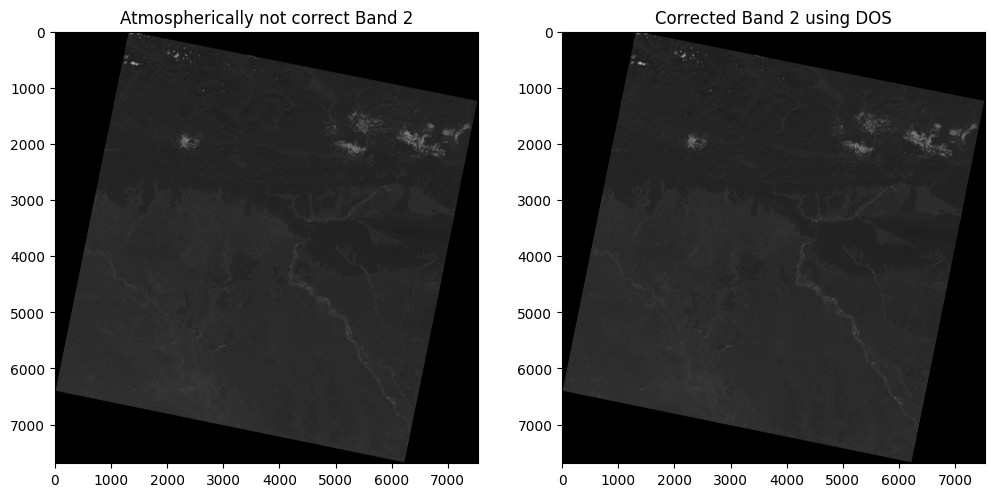

In [39]:

# Display both uncorrected and corrected bands side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(calibrated_band, cmap='gray')
axes[0].set_title('Atmospherically not correct Band 2')

axes[1].imshow(atm_corrected_band, cmap='gray')
axes[1].set_title('Corrected Band 2 using DOS')
plt.savefig('Atmospheric correction')
plt.show()

In [42]:
#save the corrected band to a new file
output_path = '/content/output_raster/b2_dos.tif'
with rasterio.open(
    output_path,
    'w',
    driver='GTiff',
    height=calibrated_band.shape[0],
    width=calibrated_band.shape[1],
    count=1,
    dtype=calibrated_band.dtype,
    crs=src.crs,
    transform=src.transform,
) as dst:
    dst.write(calibrated_band, 1)


Similarly perform radiometric calibration for each band one by one. We can perform radiometric calibration of all band at once using loop but this is not the scope of this example